In [270]:
import numpy as np
import pandas as pd
#import sys
#!{sys.executable} -m pip install pandas-profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

    

In [271]:
#Read CSV - training dataset
df = pd.read_csv('C:/Users/kshah104/Documents/DSDJ/Kaggle WiDS Datathon/widsdatathon2020/training_v2.csv')


In [272]:
df.head()



,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [273]:
df.shape


(91713, 186)

In [274]:
df.describe


<bound method NDFrame.describe of        encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.0312

In [275]:
df[df.duplicated()].shape

(0, 186)

In [276]:
# No Duplicate Rows

In [277]:
#import pandas_profiling 
#pp.ProfileReport(df).to_file(outputfile="C:/Users/kshah104/Documents/WIDS_Project.html")
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(outputfile="./report.html")
#print(profile)

In [278]:
df.nunique()


encounter_id                     91713
patient_id                       91713
hospital_id                        147
hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
hospital_admit_source               15
icu_admit_source                     5
icu_id                             241
icu_stay_type                        3
icu_type                             8
pre_icu_los_days                  9757
readmission_status                   1
weight                            3409
albumin_apache                      35
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
arf_apache                           2
bilirubin_apache                   362
bun_apache                         476
creatinine_apache        

In [279]:
# Drop all ids as they are unique and are not required for the model
# Readmission_status - all values are 0 hence can be dropped
# Weight and height can be dropped as they are collinear to BMI

df.drop(['encounter_id','patient_id','hospital_id', 'icu_id','readmission_status','weight', 'height'],axis = 1,inplace = True)


In [280]:
df.shape

(91713, 179)

In [281]:
# Transforming BMI from numeric to categorical
# BMI Categories:
#Underweight = <18.5 =0
#Normal weight = 18.5–24.9 =1
#Overweight = 25–29.9 =2
#Obesity = BMI of 30 or greater =3

def BMICat(x) :
    try :
         x = float(x)
         if (x >= 0) and (x < 18.5) : return 'Underweight'
         elif ((x >= 18.5 ) and (x <= 24.9)) : return 'Normal Weight'
         elif ((x >= 25 )   and (x <= 29.9)) : return 'Overweight'
         else : return 'Obese'
    except ValueError:
         return 'Other'
        
 
 
   

In [282]:
df['bmi']= df['bmi'].apply(BMICat)

In [283]:
df['bmi'].head

<bound method NDFrame.head of 0        Normal Weight
1           Overweight
2                Obese
3        Normal Weight
4                Obese
             ...      
91708    Normal Weight
91709            Obese
91710       Overweight
91711    Normal Weight
91712    Normal Weight
Name: bmi, Length: 91713, dtype: object>

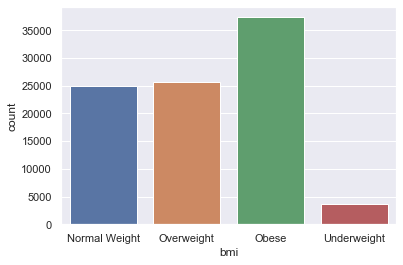

In [284]:
# df['bmi'].value_counts().plot.bar() 

#import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x=df['bmi'], data=df)


In [285]:
# Transforming pre_icu_los_days into categorical
# pre_icu_los_days Categories:
# '0' = <= 0
# '1' = > 0 and <= 5
# '2' = > 5 and <= 10
# '3' = > 10 and <= 15
# '4' = > 15 and <= 20
# '5' = > 20 and <= 25
# '6' = > 25 and <= 30
# '7' => 30

def PILDCat(x) :
    try :
         x = float(x)
         if (x <= 0)                : return 'Range[- to 0]'
         elif (x > 0) and (x <= 5) : return  'Range[1 to 5]'
         elif (x > 5) and (x <= 10) : return 'Range[5 to 10]'
         elif (x > 10) and (x <= 15) : return 'Range[11 to 15]'
         elif ((x > 15) and (x <= 20)) : return 'Range[16 to 20]'
         elif ((x > 20) and (x <= 25)) : return 'Range[21 to 25]'
         elif ((x > 25 ) and (x <= 30)) : return 'Range[25 to 30]'
               
         else : return 'Range[> 30]'
    except ValueError:
         return 'Other'

In [286]:
df['pre_icu_los_days']= df['pre_icu_los_days'].apply(PILDCat)

In [287]:
df['pre_icu_los_days'].head

<bound method NDFrame.head of 0        Range[1 to 5]
1        Range[1 to 5]
2        Range[1 to 5]
3        Range[1 to 5]
4        Range[1 to 5]
             ...      
91708    Range[1 to 5]
91709    Range[1 to 5]
91710    Range[1 to 5]
91711    Range[1 to 5]
91712    Range[1 to 5]
Name: pre_icu_los_days, Length: 91713, dtype: object>

In [288]:
# df['pre_icu_los_days'].value_counts().plot.bar() 
#import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
chart = sns.countplot(x=df['pre_icu_los_days'], data=df, palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

ValueError: Set4 is not a valid palette name

<Figure size 720x360 with 0 Axes>

In [ ]:
#Splitting the dataset into numeric fields and categorical fields.

numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])




In [ ]:
categorical_df.shape

In [ ]:
numeric_df.shape

In [ ]:
categorical_df.head

In [ ]:
numeric_df.head